In [1]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random
import keras

import integrated_gradients as ig
import my_utils
from metaplot import Metaplot, one_hot_encode

def plot_meta(data, model, subset=None):

    if subset is None:
        print(len(data))
        data_seq = one_hot_encode(data, seq_len=50)
        data_ig = ig.integrated_gradients(model, data_seq)
        Metaplot(data_ig, colorbar = True)
    
    elif subset == 'lowest_ten':
        data_lowest_ten = data[data['pred'] <= data['pred'].quantile(0.1)]
        print(len(data_lowest_ten))
        lowest_ten_seq = one_hot_encode(data_lowest_ten, seq_len=50)
        lowest_ten_ig = ig.integrated_gradients(model, lowest_ten_seq)
        Metaplot(lowest_ten_ig, colorbar = True)

    elif subset == 'highest_ten':
        data_highest_ten = data[data['pred'] >= data['pred'].quantile(0.9)]
        print(len(data_highest_ten))
        highest_ten_seq = one_hot_encode(data_highest_ten, seq_len=50)
        highest_ten_ig = ig.integrated_gradients(model, highest_ten_seq)
        Metaplot(highest_ten_ig, colorbar = True)
        
    else:
        raise ValueError()

In [2]:
#import data
test_random = pd.read_csv('/Users/frederickkorbel/Documents/projects/paper/data/MRL_pred.csv')
test_human = pd.read_csv('/Users/frederickkorbel/Documents/projects/paper/data/hMRL_human_50_test_pred.csv')


#import models
mrl_model = keras.models.load_model('/Users/frederickkorbel/Documents/projects/paper/data/models/main_MRL_model.hdf5')
hmrl_model = keras.models.load_model('/Users/frederickkorbel/Documents/projects/paper/data/models/human_MRL_model.hdf5')

#remove FP/FN
#test_random = test_random[(test_random['pred'] - test_random['rl']) <= 1.0] #FP
#test_random = test_random[(test_random['rl'] - test_random['pred']) <= 2.0] #FN
test_random = my_utils.analyze(test_random)

#test_human = test_human[(test_human['pred'] - test_human['rl']) <= 1.0] #FP
#test_human = test_human[(test_human['rl'] - test_human['pred']) <= 2.0] #FN
test_human = my_utils.analyze(test_human)

#separate categories

# no uAUG (=control)
no_uaug_random = test_random[test_random['utr'].apply(lambda x: 'ATG' not in x)]
no_uaug_human = test_human[test_human['utr'].apply(lambda x: 'ATG' not in x)]
# IF uORFs
if_uorf_random = test_random[(test_random['aug_number'] == 1) & (test_random['orfs_inframe'].map(lambda x: x[0]) == 1)]
if_uorf_human = test_human[(test_human['aug_number'] == 1) & (test_human['orfs_inframe'].map(lambda x: x[0]) == 1)]
# OOF uORFs
oof_uorf_random = test_random[(test_random['orf_number'] == 1) & (test_random['aug_number'] == 1) & (test_random['orfs_inframe'].map(lambda x: x[0]) == 0)]
oof_uorf_human = test_human[(test_human['orf_number'] == 1) & (test_human['aug_number'] == 1) & (test_human['orfs_inframe'].map(lambda x: x[0]) == 0)]
# IF uAUG (N-terminal extension)
if_uaug_random = test_random[(test_random['orf_number'] == 0) & (test_random['aug_number'] == 1) & (test_random['aug_inframe'] == 1)]
if_uaug_human = test_human[(test_human['orf_number'] == 0) & (test_human['aug_number'] == 1) & (test_human['aug_inframe'] == 1)]
# OOF uAUG (overlapping uORF)
oof_uaug_random = test_random[(test_random['orf_number'] == 0) & (test_random['aug_number'] == 1) & (test_random['aug_inframe'] == 0)]
oof_uaug_human = test_human[(test_human['orf_number'] == 0) & (test_human['aug_number'] == 1) & (test_human['aug_inframe'] == 0)]
#ambiguous (multiple and/or mixed uAUGs/uORFs)
amb_random = test_random[(test_random['orf_number'] + test_random['aug_number']) >= 2]
amb_human = test_human[(test_human['orf_number'] + test_random['aug_number']) >= 2]


2022-04-07 13:22:54.357493: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/var/folders/6b/4m6tvsws1rvb767d463fsk7r0000gn/T/ipykernel_39934/219725935.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  amb_human = test_human[(test_human['orf_number'] + test_random['aug_number']) >= 2]


<font color=skyblue size=30> Meta-Attribution of 5'UTR Signals (Random) </font>

<font color=skyblue size=5> No uAUG = control </font>

6014


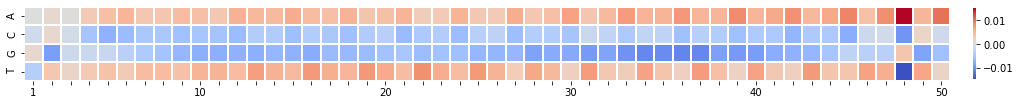

602


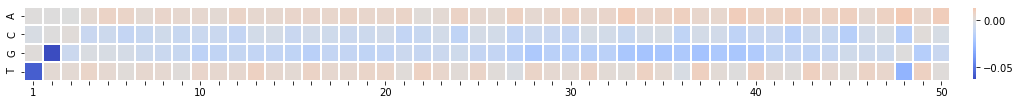

602


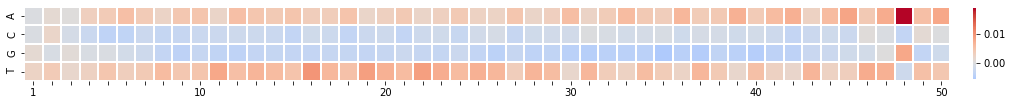

In [3]:
plot_meta(no_uaug_random, mrl_model)
plot_meta(no_uaug_random, mrl_model, subset='lowest_ten')
plot_meta(no_uaug_random, mrl_model, subset='highest_ten')

<font color=skyblue size=5> One non-overlapping uORF IF </font>

704


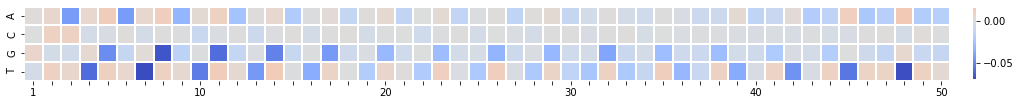

71


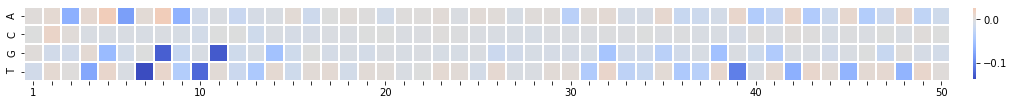

71


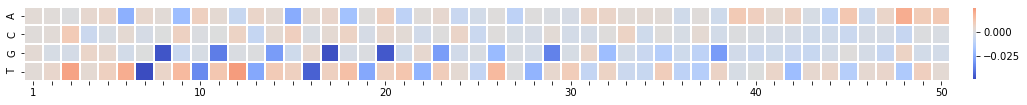

In [4]:
plot_meta(if_uorf_random, mrl_model)
plot_meta(if_uorf_random, mrl_model, subset='lowest_ten')
plot_meta(if_uorf_random, mrl_model, subset='highest_ten')

<font color=skyblue size=5> One non-overlapping uORF OOF </font>

1343


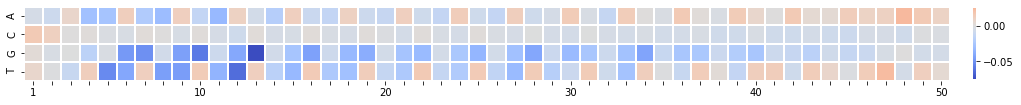

135


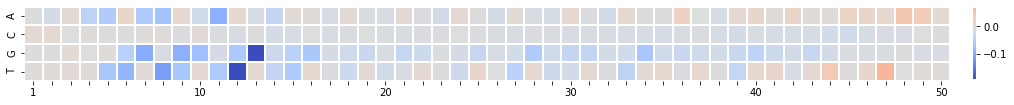

135


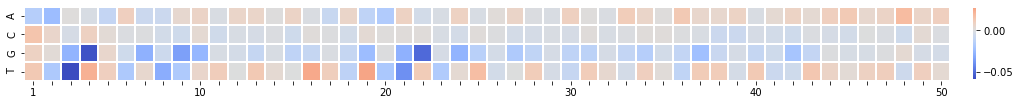

In [5]:
plot_meta(oof_uorf_random, mrl_model)
plot_meta(oof_uorf_random, mrl_model, subset='lowest_ten')
plot_meta(oof_uorf_random, mrl_model, subset='highest_ten')

<font color=skyblue size=5> IF uAUG </font>

1431


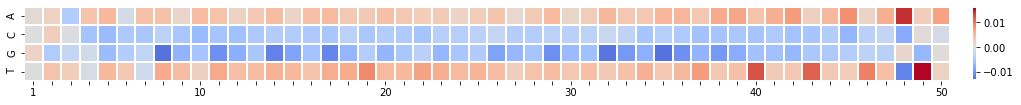

144


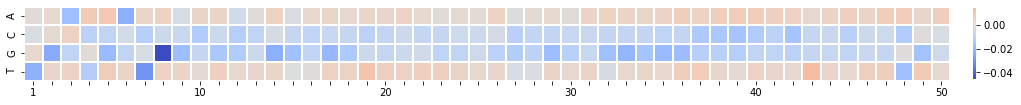

144


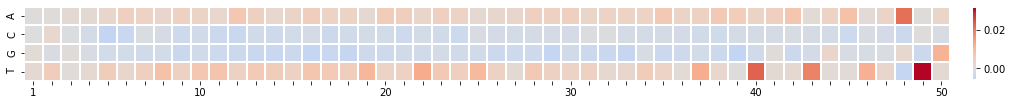

In [6]:
plot_meta(if_uaug_random, mrl_model)
plot_meta(if_uaug_random, mrl_model, subset='lowest_ten')
plot_meta(if_uaug_random, mrl_model, subset='highest_ten')

<font color=skyblue size=5> OOF uAUG </font>

5297


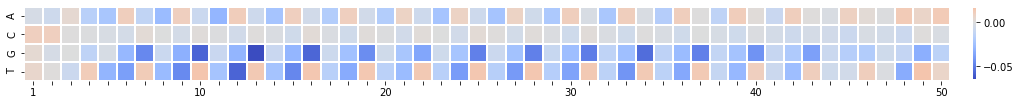

530


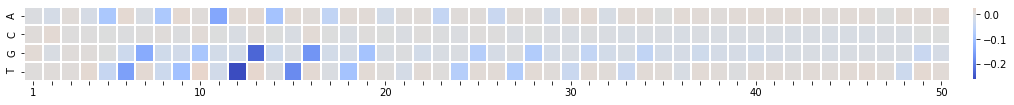

530


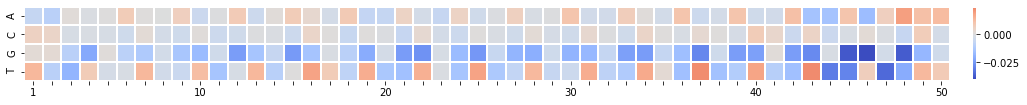

In [7]:
plot_meta(oof_uaug_random, mrl_model)
plot_meta(oof_uaug_random, mrl_model, subset='lowest_ten')
plot_meta(oof_uaug_random, mrl_model, subset='highest_ten')

<font color=skyblue size=5> Ambiguous </font>

7258


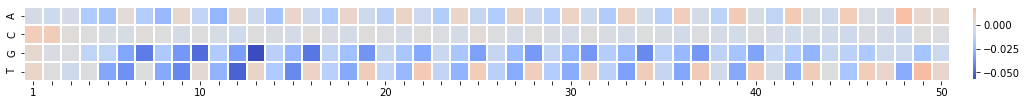

726


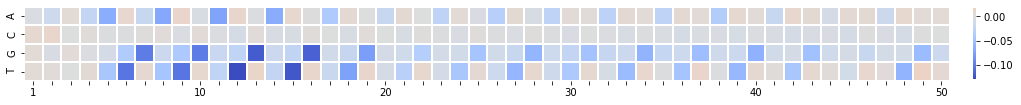

726


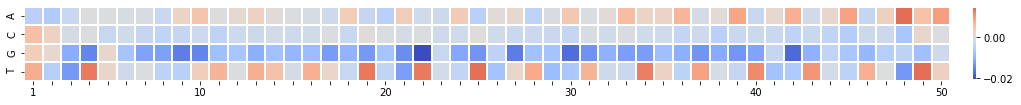

In [8]:
plot_meta(amb_random, mrl_model)
plot_meta(amb_random, mrl_model, subset='lowest_ten')
plot_meta(amb_random, mrl_model, subset='highest_ten')

<font color=skyblue size=30> Meta-Attribution of 5'UTR Signals (Human) </font>

<font color=skyblue size=5> No uAUG = control </font>

3698


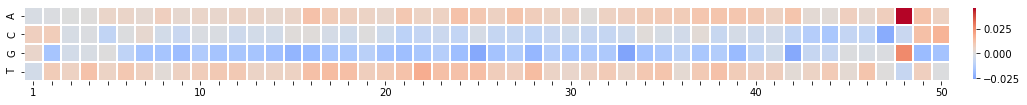

370


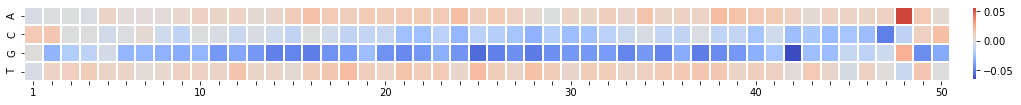

370


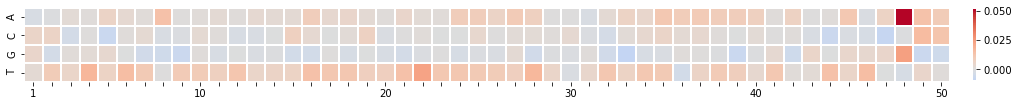

In [9]:
plot_meta(no_uaug_human, hmrl_model)
plot_meta(no_uaug_human, hmrl_model, subset='lowest_ten')
plot_meta(no_uaug_human, hmrl_model, subset='highest_ten')

<font color=skyblue size=5> One non-overlapping uORF IF </font>

85


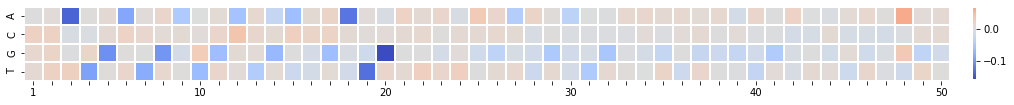

9


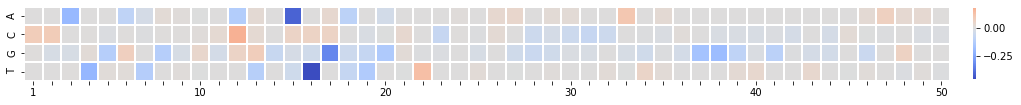

9


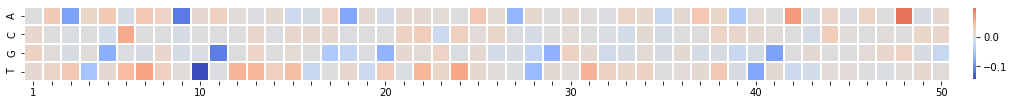

In [10]:
plot_meta(if_uorf_human, hmrl_model)
plot_meta(if_uorf_human, hmrl_model, subset='lowest_ten')
plot_meta(if_uorf_human, hmrl_model, subset='highest_ten')

<font color=skyblue size=5> One non-overlapping uORF OOF </font>

201


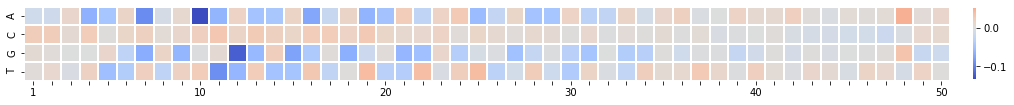

21


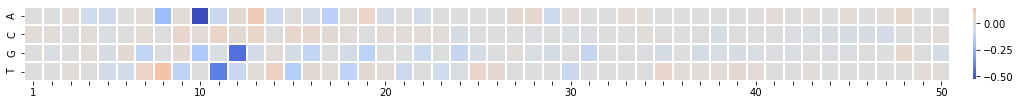

21


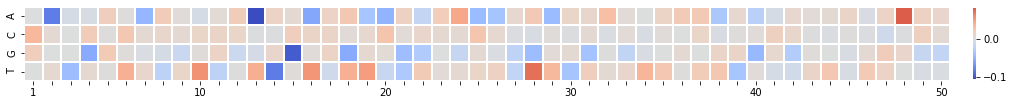

In [11]:
plot_meta(oof_uorf_human, hmrl_model)
plot_meta(oof_uorf_human, hmrl_model, subset='lowest_ten')
plot_meta(oof_uorf_human, hmrl_model, subset='highest_ten')

<font color=skyblue size=5> uAUG IF </font>

56


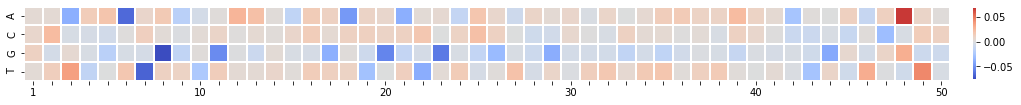

6


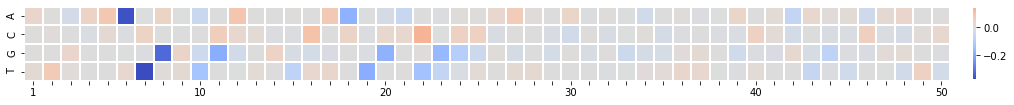

6


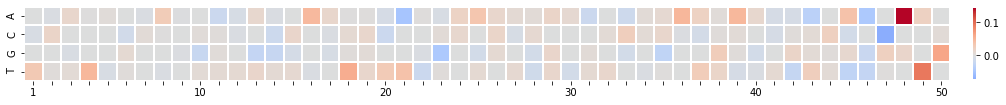

In [12]:
plot_meta(if_uaug_human, hmrl_model)
plot_meta(if_uaug_human, hmrl_model, subset='lowest_ten')
plot_meta(if_uaug_human, hmrl_model, subset='highest_ten')

<font color=skyblue size=5> uAUG OOF </font>

660


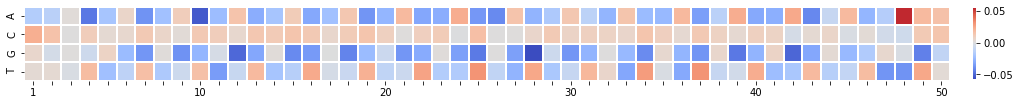

66


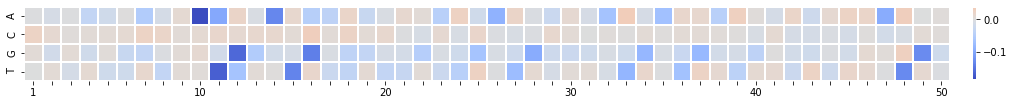

66


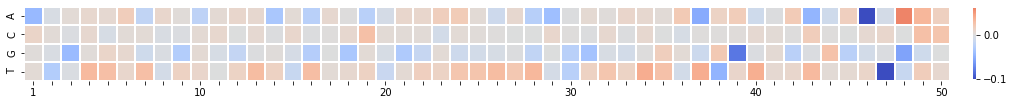

In [13]:
plot_meta(oof_uaug_human, hmrl_model)
plot_meta(oof_uaug_human, hmrl_model, subset='lowest_ten')
plot_meta(oof_uaug_human, hmrl_model, subset='highest_ten')

<font color=skyblue size=5> Ambiguous </font>

1815


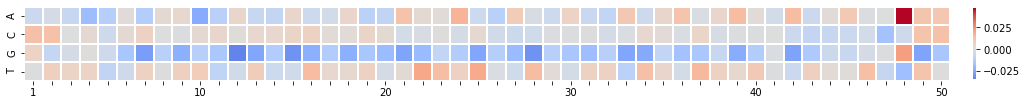

182


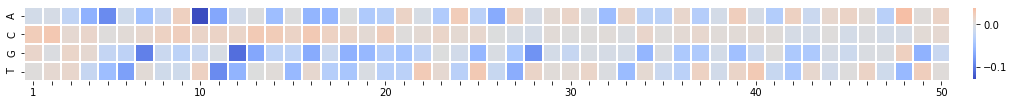

182


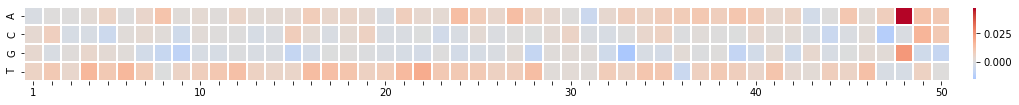

In [14]:
plot_meta(amb_human, hmrl_model)
plot_meta(amb_human, hmrl_model, subset='lowest_ten')
plot_meta(amb_human, hmrl_model, subset='highest_ten')

<font color=skyblue size=30> How does Presence of Upstream Initiation Signal influence MRL? </font>

<font color=skyblue size=5> O5P->Random </font>

/Users/frederickkorbel/Documents/projects/paper/mlcis/my_utils.py:302: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['feature'][x] = 'OOF_OV_uORF'
/Users/frederickkorbel/Documents/projects/paper/mlcis/my_utils.py:303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfy['feature'][x] = 'OOF_OV_uORF'


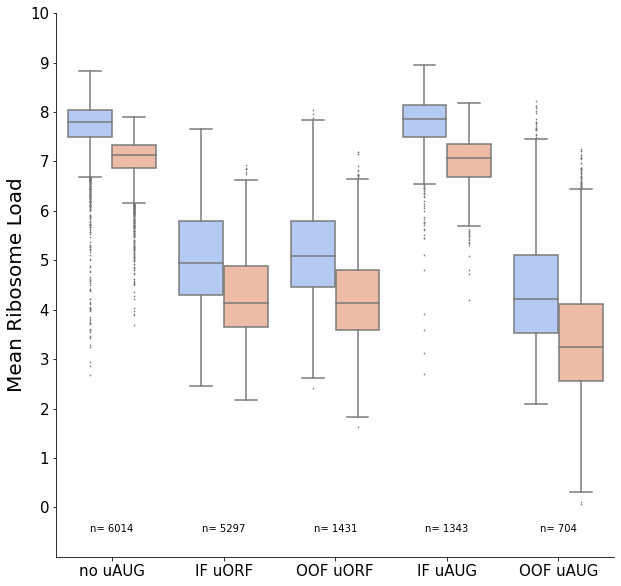

In [18]:
comp_data_random = my_utils.barplot_mrl(test_random)

fig, ax = plt.subplots(figsize = (10,10))
fig = sns.boxplot(data=comp_data_random, x = 'feature', y = 'MRL', hue = 'pred', 
                  palette= 'coolwarm', #{False:'skyblue', True:'orange'}
                  order = ['None', 'IF_uORF', 'OOF_uORF', 'NTEx', 'OOF_OV_uORF'],
                  flierprops={'markerfacecolor':'black', 'markersize':0.8})

fig.set(ylim=(-1,10),yticks=range(0,11,1),
        xlabel='5UTR Sequence Feature',ylabel='Mean Ribosome Load')


plt.xticks([0,1,2,3,4], ['no uAUG', 'IF uORF', 'OOF uORF', 'IF uAUG', 'OOF uAUG'], fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Mean Ribosome Load', fontsize=20)
plt.xlabel('')

# calculate sample size per group and median to position labels in the plot
medians = comp_data_random.groupby(['feature'])['MRL'].median().values
n = comp_data_random['feature'][:(int(len(comp_data_random)/2))].value_counts().values
n = [str(x) for x in n.tolist()]
n = ["n= " + i for i in n]

# add everything to the plot
pos = range(len(n))
for tick, label in zip(pos, ax.get_xticklabels()):
        ax.text(pos[tick], -0.5, n[tick], horizontalalignment='center', size='medium', color='black')

sns.despine()
plt.legend([],[], frameon=False)


<font color=skyblue size=5> hMRL->Human </font>

/Users/frederickkorbel/Documents/projects/paper/mlcis/my_utils.py:302: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['feature'][x] = 'OOF_OV_uORF'
/Users/frederickkorbel/Documents/projects/paper/mlcis/my_utils.py:303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfy['feature'][x] = 'OOF_OV_uORF'


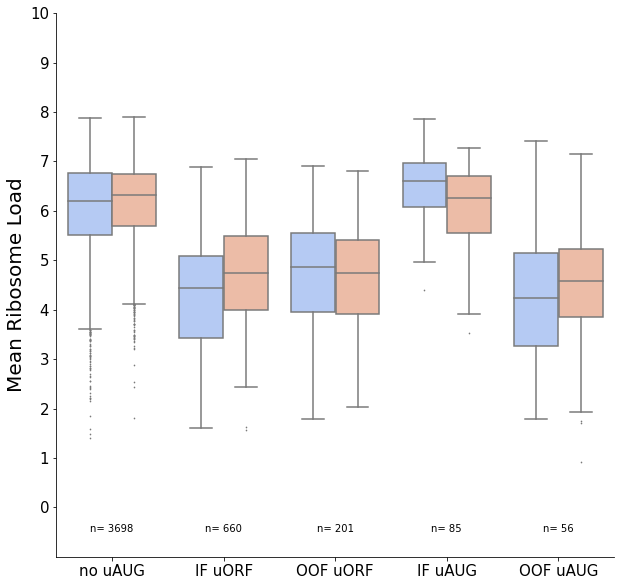

In [17]:
comp_data_human = my_utils.barplot_mrl(test_human)

fig, ax = plt.subplots(figsize = (10,10))
fig = sns.boxplot(data=comp_data_human, x = 'feature', y = 'MRL', hue = 'pred', 
                  palette= 'coolwarm', #{False:'skyblue', True:'orange'}
                  order = ['None', 'IF_uORF', 'OOF_uORF', 'NTEx', 'OOF_OV_uORF'],
                  flierprops={'markerfacecolor':'black', 'markersize':0.8})
fig.set(ylim=(-1,10),yticks=range(0,11,1),
        xlabel='5UTR Sequence Feature',ylabel='Mean Ribosome Load')


plt.xticks([0,1,2,3,4], ['no uAUG', 'IF uORF', 'OOF uORF', 'IF uAUG', 'OOF uAUG'], fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Mean Ribosome Load', fontsize=20)
plt.xlabel('')

# calculate sample size per group and median to position labels in the plot
medians = comp_data_human.groupby(['feature'])['MRL'].median().values
n = comp_data_human['feature'][:(int(len(comp_data_human)/2))].value_counts().values
n = [str(x) for x in n.tolist()]
n = ["n= " + i for i in n]

# add everything to the plot
pos = range(len(n))
for tick, label in zip(pos, ax.get_xticklabels()):
        ax.text(pos[tick], -0.5, n[tick], horizontalalignment='center', size='medium', color='black')

sns.despine()
plt.legend([],[], frameon=False)